# Retail Analysis with Walmart Data

**Dataset Description**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number

- Date - the week of sales-Weekly_Sales -  sales for the given store

- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

- Temperature - Temperature on the day of sale

- Fuel_Price - Cost of fuel in the region

- CPI – Prevailing consumer price index

- Unemployment - Prevailing unemployment rate

**Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


**Basic Statistics tasks**

1. Which store has maximum sales

2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3. Which store/s has good quarterly growth rate in Q3’2012

4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in     non-holiday season for all stores together

5. Provide a monthly and semester view of sales in units and give insights

**Q1**. Which store has maximum sales
   
Solution :

In [1]:
# First Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Read Data from CSV file and store in df Variable
df=pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#To Check shape of Data
df.shape

(6435, 8)

In [4]:
#To Check Basic Statistics
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
# To Get All Total Unique  Store Number
Total_Unique=df['Store'].unique()

In [6]:
#To Get Maximum Sales
df.sort_values(by='Weekly_Sales',ascending=False).groupby('Store')['Weekly_Sales'].sum().round().max()

301397792.0

In [7]:
#To Get Highest Store Name 
highest_Sales=df.groupby('Store')['Weekly_Sales'].sum()
highest_Sales.idxmax()

20

**Observation** :
 - By Looking at above  Calculation we can say that 20 Store has maximum sales 
 - Lets Confirm by Visulation

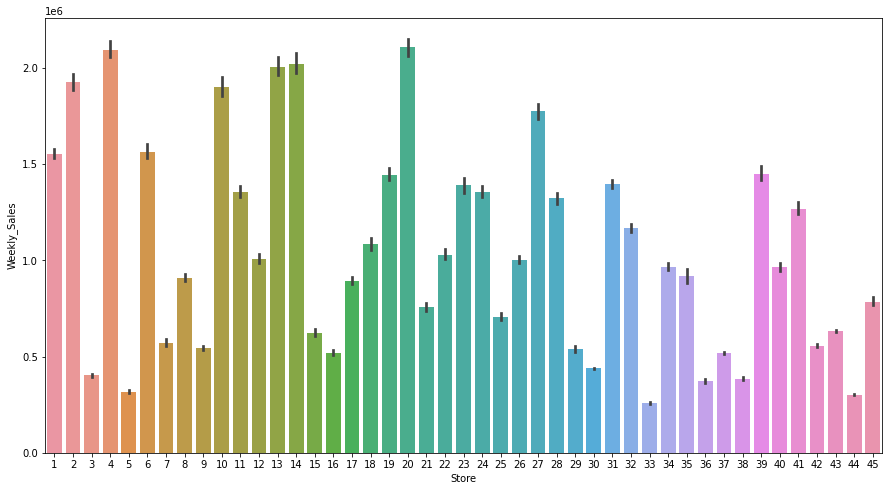

In [8]:
# Plot and Check the 20 Store has maximum sales or Not
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Store", y="Weekly_Sales", data=df)

**Observation** :
 - By Looking at Above bar Plot we can justify that 20 Store has maximum sales 

**Q2**. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


**Formula** :
 Coefficient of Variation (CV) = (Standard Deviation/Mean) × 100

In [10]:
# #To Get Highest Standard Deviation
Highest_Standard_Deviation=df.groupby('Store')['Weekly_Sales'].std()
print("Highest Standard Deviation of Sales Store :",Highest_Standard_Deviation.idxmax())

Highest Standard Deviation of Sales Store : 14


In [11]:
df_store_14 =df.loc[df['Store']==14] # To Select Store 14 in Another DataFrame
df_store_14.describe() # To Get Basic Statitics Stat Like Standard Devivation and Mean in Store 14

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,14.0,2.020978e+06,0.069930,57.790979,3.417608,186.285678,8.648748
std,0.0,3.175699e+05,0.255926,16.271612,0.443029,3.594820,0.151460
min,14.0,1.479515e+06,0.000000,24.050000,2.699000,181.646815,8.424000
25%,14.0,1.873298e+06,0.000000,45.585000,2.921000,182.619515,8.523000
50%,14.0,2.004330e+06,0.000000,58.850000,3.541000,185.937438,8.625000
75%,14.0,2.125780e+06,0.000000,72.585000,3.809000,189.924736,8.724000
max,14.0,3.818686e+06,1.000000,82.990000,4.066000,192.330854,8.992000


**Observation :**  We get Standard Deviation = 	3.175699e+05 & Mean =2.020978e+06	  

In [12]:
std_dev=3.175699e+05	
mean=2.020978e+06	
CV = (std_dev / mean)*100
print("Coefficient of Variation of Store 14 =",CV)

Coefficient of Variation of Store 14 = 15.71367427057593


**Observation** :
 - By Looking at by Calculation we can justify that 14 Store has maximum sales and Coefficient of Variation is 15.71367427057593

**Q3**. Which store/s has good quarterly growth rate in Q3’2012

First, find the Q2 sales and then Q3 sales, take out the difference and then find the growth rate.

In [13]:
#To Get 2 Quarter of Sales in 2012
q2_sales =df[(df['Date']>='2012-04-01') & (df['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round() 
#To print 5 store in 2  Quater
q2_sales.head()

Series([], Name: Weekly_Sales, dtype: float64)

In [14]:
#To Get 2 Quarter of Sales in 2012
q3_sales =df[(df['Date']>='2012-07-01') & (df['Date']<='2012-12-30')].groupby('Store')['Weekly_Sales'].sum().round()
q3_sales.head()

Series([], Name: Weekly_Sales, dtype: float64)

In [15]:
pd.DataFrame({'Q2_Sales' : q2_sales, # To Add in DataFrame of Sales in Quarter 2 
              'Q3_Sales' : q3_sales, # To Add in DataFrame of Sales in Quarter 3 
              'Difference' : (q3_sales-q2_sales), # Just Difference of Quarter 2 and Quater 3
              'Growth_Rate': ((q3_sales-q2_sales)/q3_sales * 100) #to calcuate Growth_Rate 
              }).sort_values(by=['Growth_Rate'],ascending=False).head(45) #To Print Growth_Rate from Highest to Lowest

,Q2_Sales,Q3_Sales,Difference,Growth_Rate
Store,,,,


**Growth Rate in Q3'2012** 



 **Observation**- No store has shown quarterly growth in quarter’3 2012.

In [16]:
#To Change Data Type of Date from Object
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\p

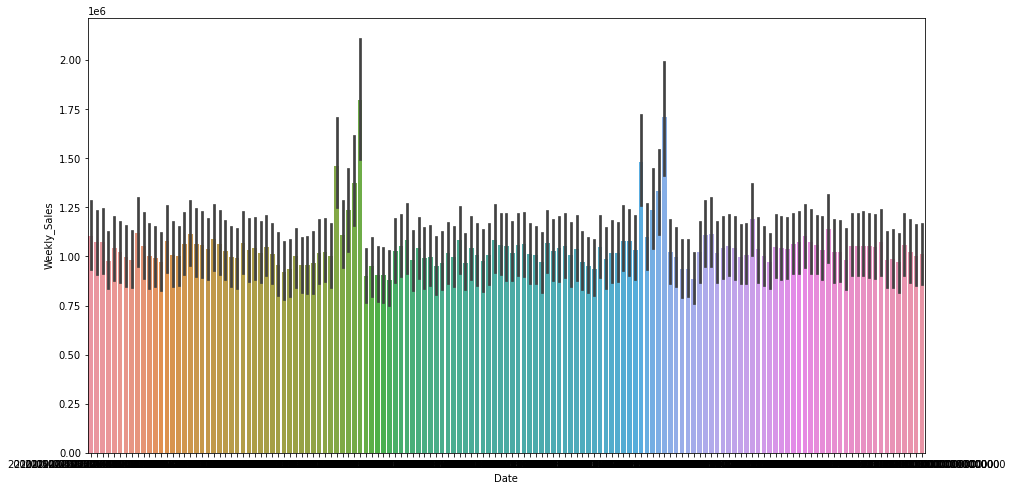

In [17]:
plt.figure(figsize = (15,8))
q3 = sns.barplot(x="Date", y="Weekly_Sales", data=df)

In [18]:
u=df['Date'].unique()
u

array(['2010-05-02T00:00:00.000000000', '2010-12-02T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-05-03T00:00:00.000000000', '2010-12-03T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-02-04T00:00:00.000000000', '2010-09-04T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-07-05T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-04-06T00:00:00.000000000',
       '2010-11-06T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-02-07T00:00:00.000000000',
       '2010-09-07T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-06-08T00:00:00.000000000', '2010-08-13

In [19]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [20]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,10,2012


In [21]:
# df_2012 =df.loc[df['Year']==2012]
# df_2012 

In [22]:
#Quarter1 = Month 1,2,3
#Quarter2 = Month 4,5,6
#Quarter3 = Month 7,8,9
#Quarter1 = Month 10,11,12

In [23]:
#  df_2012_Q3 = df_2012.loc[(df_2012['Month']>6) &(df_2012['Month']<10)]
#  df_2012_Q3

In [24]:
#  Max_Sales_2012_Q3=df_2012_Q3.groupby('Store')['Weekly_Sales'].sum().round()
#  Max_Sales_2012_Q3

**Q4**. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in     non-holiday season for all stores together

**Holiday Event :**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 [2010-02-12, 2011-02-11,2012-02-10,2013-02-08]

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 [2010-09-10,2011-09-09,2012-09-07,2013-09-06]

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13[2010-11-26,2011-11-25,2013-11-23,2013-11-29]

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13[2010-12-31, 2011-12-30, 2012-12-28, 2013-12-27]


In [25]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


**Observation** : - In the Above dataset Holiday_Flag indicates the Holiday.


                  - Holiday_Flag= 0 Means No Holiday.
                  - Holiday_Flag= 1 Means Holiday.

In [26]:
# Taking Holiday Attribute and store in df_wallmart_holiday
df_wallmart_holiday=df.groupby('Holiday_Flag')

# to store Holiday in df_holidays_df Variable
df_holidays=df_wallmart_holiday.get_group(1) 

# to store No Holiday in df_nonholidays_df Variable
df_nonholidays=df_wallmart_holiday.get_group(0)


In [27]:
mean_nonholiday_sales=df_nonholidays['Weekly_Sales'].mean() # to Get the mean of Non Holiday
print("This is the mean of Non-Holiday :\n",mean_nonholiday_sales)

This is the mean of Non-Holiday :
 1041256.3802088555


In [28]:
mean_holiday_sales=df_holidays['Weekly_Sales'].mean() # to Get the mean of Non Holiday
print("This is the mean of Non-Holiday :\n",mean_holiday_sales)

This is the mean of Non-Holiday :
 1122887.8923555557


In [29]:
# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
df_holidays[df_holidays['Weekly_Sales']>mean_nonholiday_sales]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,10,2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,11,2011
...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,12,2011
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,10,2012
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,7,2012
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,11,2010


**Observation :** Above dataset display  higher sales than the mean sales in non-holiday season for all stores 

**Q5**. Provide a monthly and semester view of sales in units and give insights

Text(0.5, 1.0, 'Monthly View Of Sales')

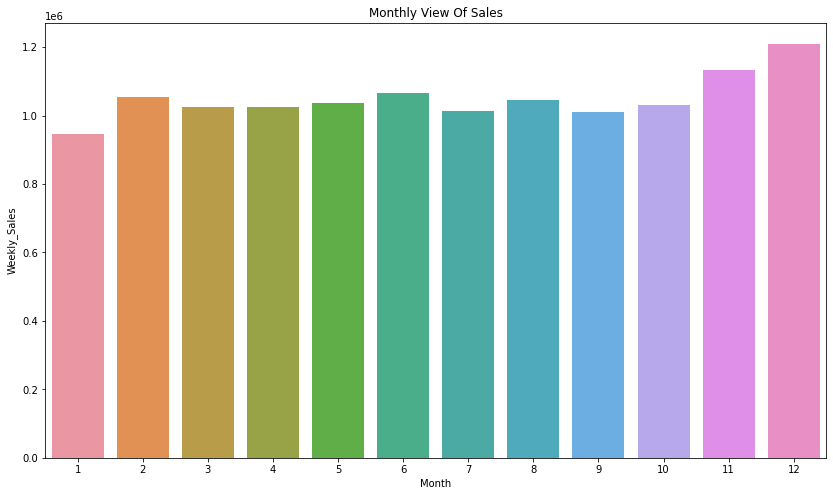

In [30]:
plt.figure(figsize=(14,8))
Month_View = sns.barplot(x="Month", y="Weekly_Sales", data=df,ci=None)
Month_View.set_title('Monthly View Of Sales')

**Observation :** 
  - Above Bar plot Show the  December has Highest Sales

In [31]:
#for month 1 to 6,Semester 1
#for month 7 to 12,Semester 2
df['Semester']=np.where(df['Month']< 7, 1, 2)

In [32]:
df.head()    

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,1


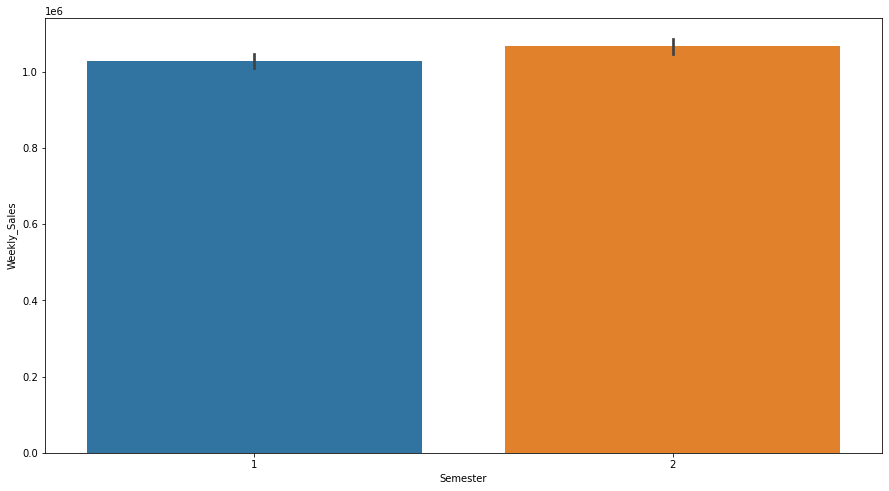

In [33]:
# Plot and Check the which is 
plt.figure(figsize = (15,8))
Semester = sns.barplot(x="Semester", y="Weekly_Sales", data=df)

**Observation :**
 - Semester 2 has Highest Sales
 - Also see in Monthly Wise Plot which show most of the month after june has Highest Sales Compare to before june 

**Statistical Model**

- For Store 1 – Build  prediction models to forecast demand

- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

- Change dates into days by creating new variable.

- Select the model which gives best accuracy

- For Store 1 – Build  prediction models to forecast demand

- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

- Change dates into days by creating new variable.

- Select the model which gives best accuracy

For Store 1 – Build  prediction models to forecast demand

In [34]:
df1=df.loc[df['Store'] == 14]

In [35]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Semester
1859,14,2010-05-02,2623469.95,0,27.31,2.784,181.871190,8.992,5,2010,1
1860,14,2010-12-02,1704218.84,1,27.73,2.773,181.982317,8.992,12,2010,2
1861,14,2010-02-19,2204556.70,0,31.27,2.745,182.034782,8.992,2,2010,1
1862,14,2010-02-26,2095591.63,0,34.89,2.754,182.077469,8.992,2,2010,1
1863,14,2010-05-03,2237544.75,0,37.13,2.777,182.120157,8.992,5,2010,1


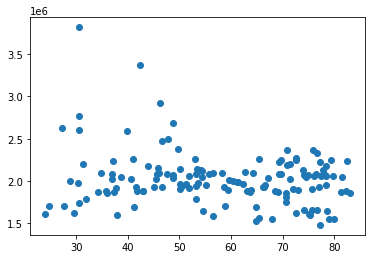

-0.1998514916576683


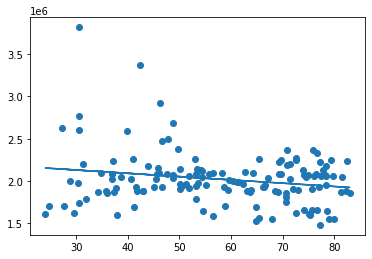

In [36]:
x = df1['Temperature'] #x = df1['Temperature','Fuel_Price','CPI','Unemployment']
y = df1['Weekly_Sales']

plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)

plt.plot(x, mymodel)
plt.show()

In [37]:
x = df1['Temperature','Fuel_Price','CPI','Unemployment']
y = df1['Weekly_Sales']

KeyError: ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment')

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
predicteddf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicteddf

NameError: name 'X_train' is not defined

In [ ]:
# coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# coeff_df

In [ ]:
# from sklearn import metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# df1['date'] = pd.to_datetime(df['date'], dayfirst=True)
# df1['exp_day'] = (df['date']-df['date'].min()).dt.days + experiment_day_start

In [ ]:
# df['date'] = pd.to_datetime(df['date'], dayfirst=True)
# df['exp_day'] = (df['date']-df['date'].min()).dt.days + experiment_day_start
# experiment_day_start=5
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# df['exp_day'] = (df['Date']-df['Date'].min()).dt.days + experiment_day_start=5
# df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
# df1['exp_day'] = (df1['Date']-df1['Date'].min()).dt.days + experiment_day_start

# df1=df.loc[df['Store'] == 1]
# X = df1[['Temperature','Fuel_Price','Unemployment','CPI','exp_day']]
# y = df1['Weekly_Sales']
# X = df1[['Unemployment','CPI','exp_day']]
# y = df1['Weekly_Sales']